# Skill Trend Analysis
### Methology
1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

### Cleaning and calculating

In [2]:
job_title = 'Data Analyst'

# Pivot table
df_exploded = df[df['job_title_short'] == job_title].explode('job_skills').copy()
df_exploded['job_posted_month'] = df_exploded['job_posted_date'].dt.month
df_DA_pivot = df_exploded.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='size', fill_value=0)
df_DA_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
2,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
3,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
4,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
5,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
6,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
7,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
8,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
9,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


### Convert month num to month name

In [3]:
df_DA_pivot.reset_index(inplace=True)
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
Feb,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
Mar,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
Apr,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
May,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
Jun,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
Jul,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
Aug,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
Sep,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


### Sorting skills count value

In [4]:
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
Feb,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
Mar,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
Apr,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
May,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
Jun,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
Jul,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
Aug,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
Sep,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_DA_pivot = df_DA_pivot.iloc[:, :5]
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi
job_posted_month,,,,,
Jan,11336,8170,6606,5596,4285
Feb,7947,5772,4751,3936,3307
Mar,7868,5675,4741,4051,3176
Apr,7553,5496,4557,3776,3106
May,6617,4773,4070,3245,2695
Jun,7584,5724,4707,3812,3275
Jul,7687,5513,4831,3928,3350
Aug,8823,6482,5576,4533,3859
Sep,6829,4886,4229,3446,3118


### Plotting the skill trend

C:\Users\duyvn\AppData\Local\Temp\ipykernel_12556\4104816140.py:2: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(


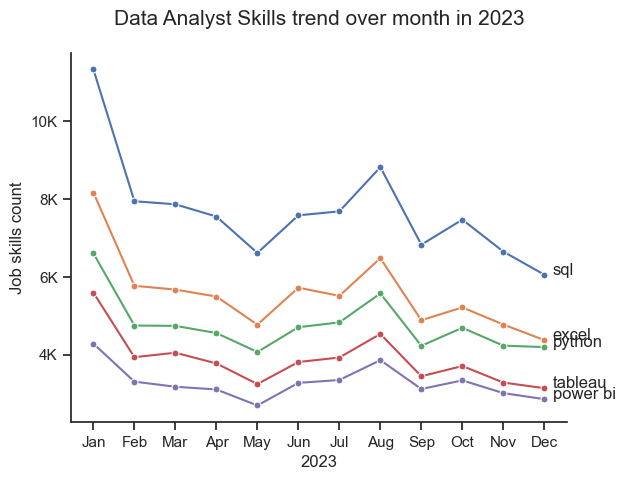

In [11]:
ax = plt.gca()
sns.lineplot(
    data=df_DA_pivot, 
    dashes=False,
    legend=False,
    markers='o',
    markersize=5
)
sns.set_theme('notebook', style='ticks')
sns.despine()
ax.set_title('Data Analyst Skills trend over month in 2023', fontsize=15, pad=20)
ax.set_xlabel(2023)
ax.set_ylabel('Job skills count')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f"{int(x/1000)}K"))

for i in range(5):
    ax.text(11.2, df_DA_pivot.iloc[-1, i], df_DA_pivot.columns[i])

# Add labels to each line with an offset to prevent overlap
# for i, (line, name) in enumerate(zip(ax.lines, df_DA_pivot.columns)):
#     x = line.get_xdata()[-1] + 0.2  # Last x-coordinate
#     y = line.get_ydata()[-1] + 0.2  # Last y-coordinate
#     # Apply an offset based on the index
#     offset = 0.05 * (i % 2 * 2 - 1)  # Alternates +0.05 and -0.05 to stagger labels
#     ax.text(
#         x,
#         y,
#         name,
#         color=line.get_color(),
#         ha='left',
#         va='center'
#     )

plt.show()

### Skill trend by percentage

In [7]:
# Pivot table
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
df_DA['job_posted_month'] = df_DA['job_posted_date'].dt.month
df_DA_explode = df_DA.explode('job_skills')
df_pivot_DA = df_DA_explode.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='size', fill_value=0)

# Sorting values
df_pivot_DA.loc['Total'] = df_pivot_DA.sum()
df_pivot_DA = df_pivot_DA[df_pivot_DA.loc['Total'].sort_values(ascending=False).index]
df_pivot_DA = df_pivot_DA.drop('Total')
df_pivot_DA

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_DA_total = df_DA.groupby('job_posted_month').size()
df_pivot_DA = df_pivot_DA.div(df_DA_total/100, axis=0)
df_pivot_DA

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,48.064448,34.640661,28.009328,23.726945,18.168327,15.293619,16.239135,7.971168,7.538690,5.304219,...,0.00848,0.000000,0.000000,0.00424,0.000000,0.000000,0.000000,0.00424,0.000000,0.00000
2,47.994927,34.859283,28.693079,23.770987,19.972219,15.557434,15.907718,7.796835,7.458630,5.761565,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
3,48.439328,34.938127,29.187958,24.939974,19.553038,16.314720,15.723696,7.794127,7.406267,5.491596,...,0.00000,0.006156,0.000000,0.00000,0.000000,0.000000,0.006156,0.00000,0.000000,0.00000
4,48.685059,35.426067,29.373469,24.339306,20.020627,15.463452,16.746165,7.670491,7.586696,6.104164,...,0.00000,0.000000,0.000000,0.00000,0.006446,0.000000,0.000000,0.00000,0.000000,0.00000
5,49.295985,35.558370,30.321091,24.174924,20.077479,15.592639,14.452805,7.293452,7.129554,6.339864,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00745
6,47.376312,35.757121,29.404048,23.813093,20.458521,15.254873,13.580710,7.327586,7.727386,6.165667,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
7,47.760174,34.252874,30.015533,24.405095,20.813917,15.184840,13.159366,6.809568,6.641814,6.188257,...,0.00000,0.000000,0.006213,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
8,47.364183,34.797080,29.933434,24.334335,20.716126,15.970582,13.742753,7.150526,6.968005,5.996350,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
9,45.620950,32.640791,28.251720,23.020910,20.829715,14.336295,12.559289,6.306366,6.313047,5.691763,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000


In [9]:
df_pivot_DA.reset_index(inplace=True)
df_pivot_DA['job_posted_month'] = df_pivot_DA['job_posted_month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_pivot_DA = df_pivot_DA.set_index('job_posted_month')
df_pivot_DA = df_pivot_DA.iloc[:, :5]
df_pivot_DA

job_skills,sql,excel,python,tableau,power bi
job_posted_month,,,,,
Jan,48.064448,34.640661,28.009328,23.726945,18.168327
Feb,47.994927,34.859283,28.693079,23.770987,19.972219
Mar,48.439328,34.938127,29.187958,24.939974,19.553038
Apr,48.685059,35.426067,29.373469,24.339306,20.020627
May,49.295985,35.558370,30.321091,24.174924,20.077479
Jun,47.376312,35.757121,29.404048,23.813093,20.458521
Jul,47.760174,34.252874,30.015533,24.405095,20.813917
Aug,47.364183,34.797080,29.933434,24.334335,20.716126
Sep,45.620950,32.640791,28.251720,23.020910,20.829715


C:\Users\duyvn\AppData\Local\Temp\ipykernel_12556\2111367062.py:3: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(


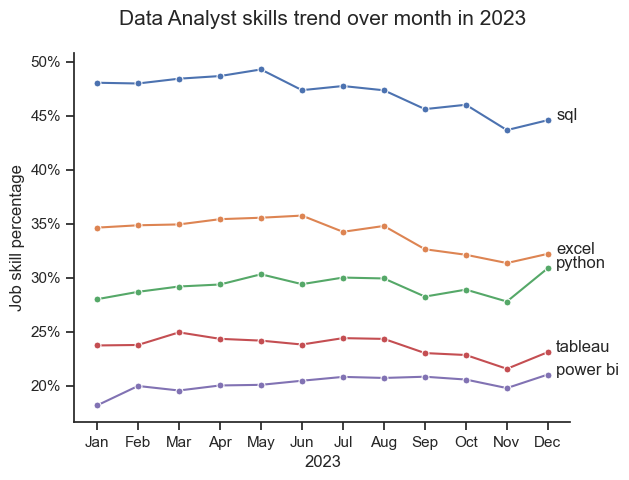

In [10]:
from matplotlib.ticker import PercentFormatter

sns.lineplot(
    data=df_pivot_DA,
    dashes=False,
    legend=False,
    markers='o',
    markersize=5
)
sns.set_theme(style='ticks')
sns.despine()

for i in range(5):
    plt.text(11.2, df_pivot_DA.iloc[-1, i], df_pivot_DA.columns[i])

ax = plt.gca()
ax.set_xlabel(2023)
ax.set_ylabel('Job skill percentage')
ax.set_title('Data Analyst skills trend over month in 2023', fontsize=15, pad=20)
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))